In [10]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
cwd = os.getcwd()
print(cwd)

/Users/fmichaud/PycharmProjects/medeas_simulations/two_population


In [11]:
simulation_subfolder = "all_distance_D"
cwd = os.getcwd()
simulation_subfolder = os.path.join(cwd,simulation_subfolder)
Ls = [10000]
Ds = np.array([10**(-i/4+1) for i in range(17)])
all_distances1= [[0,0]]
sigma1 = [[0,0,0]]
for L in Ls:
    for D in Ds:
        distance_summary_file = os.path.join(simulation_subfolder,f'L_{L}_D_{D}.dat')
        distances  = np.loadtxt(distance_summary_file)
        for distance in distances:
           all_distances1 = np.append(all_distances1,[[D,distance[0]]],axis = 0)
        sigma_within = np.std(distances[1:,0],ddof=1)
        sigma_outside = np.sqrt(np.sum((distances[1:,0]-2*D)**2)/len(distances[1:,0]))
        sigma1 = np.append(sigma1,[[L,sigma_within, sigma_outside]],axis = 0)

In [12]:
distance_summary_file

'/Users/fmichaud/PycharmProjects/medeas_simulations/two_population/all_distance_D/L_10000_D_0.001.dat'

/Users/fmichaud/anaconda3/envs/medeas/lib/python3.6/site-packages/matplotlib/axes/_base.py:3471: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=10.0, top=10.0
  'bottom=%s, top=%s') % (bottom, top))
/Users/fmichaud/anaconda3/envs/medeas/lib/python3.6/site-packages/matplotlib/axes/_base.py:3152: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=10.0, right=10.0
  'left=%s, right=%s') % (left, right))


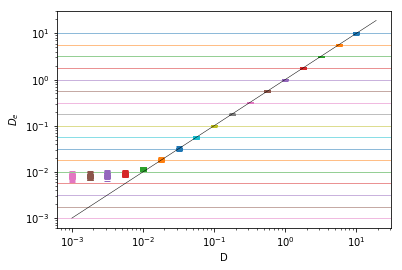

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
ax.set_xlabel("D")
ax.set_ylabel(r"$D_e$")
for index_d, D in enumerate(Ds):
    index = index_d%len(colors)
    ax.axhline(y=D,c=colors[index],lw=0.5)
    ax.loglog(all_distances1[all_distances1[:,0]==D,0],all_distances1[all_distances1[:,0]==D,1]/2,"_",c = colors[index])
    
plt.plot(np.arange(0.001,20,1),np.arange(0.001,20,1),color="black",lw = 0.5)
plt.savefig("various_D_same_L_two_pop.pdf")


/Users/fmichaud/anaconda3/envs/medeas/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/fmichaud/anaconda3/envs/medeas/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


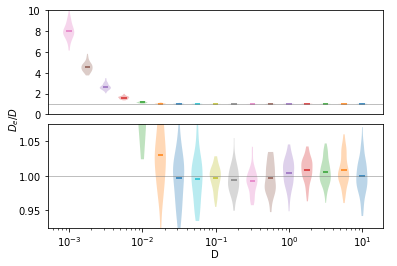

In [14]:
fig = plt.figure()

ax = fig.add_subplot(111)
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')
ax.set_xlabel("D")
ax.set_ylabel(r"$D_e/D$")


w = 0.15
width = lambda p, w: 10**(np.log10(p)+w/2.)-10**(np.log10(p)-w/2.)


ax = fig.add_subplot(212)
for index_d, D in enumerate(Ds):
    ax.violinplot(all_distances1[all_distances1[:,0]==D,1]/2/D,positions=[D], widths=width(D,w),showmeans = True,showextrema=False)
ax.set_xscale("log")
#plt.yscale("log")
ax.set_ylim((0.925,1.075))
ax.axhline(y=1,color="grey",lw=0.5)

ax = fig.add_subplot(211)
for index_d, D in enumerate(Ds):
    ax.violinplot(all_distances1[all_distances1[:,0]==D,1]/2/D,positions=[D], widths=width(D,w),showmeans = True,showextrema=False)
ax.set_xscale("log")
ax.set_ylim((0,10))

ax.tick_params(
axis='x',          # changes apply to the x-axis
which='both',      # both major and minor ticks are affected
top='off',
bottom='off',
labelbottom='off') # labels along the bottom edge are off)

fig.subplots_adjust(wspace = 0,hspace=0.09)


ax.axhline(y=1,color="grey",lw=0.5)

fig.show()

fig.savefig("various_D_same_L_two_pop_bis.pdf")

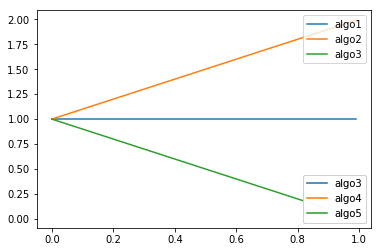

In [17]:
import itertools
from matplotlib import pyplot
import numpy as np
import matplotlib.pyplot as plt
xs = np.arange(0,1,0.01)
ys1 = 1 + 0*xs
ys2 = 1 + xs
ys3 = 1 - xs
fig,axes = plt.subplots()
axes.plot(xs,ys1)
axes.plot(xs,ys2)
axes.plot(xs,ys3)
lines = axes.get_lines()
legend1 = pyplot.legend([lines[i] for i in [0,1,2]], ["algo1", "algo2", "algo3"], loc=1)
legend2 = pyplot.legend([lines[i] for i in [0,1,2]],  ["algo3", "algo4", "algo5"], loc=4)
axes.add_artist(legend1)
axes.add_artist(legend2)

In [18]:
lines

<a list of 3 Line2D objects>